In [213]:
!pip install rich
!pip install plotly

In [214]:
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from rich.console import Console

console = Console()

## **Donwload Data**

In [215]:
df_genomics = pd.read_csv('https://storage.googleapis.com/questionsanswersproject/Multivariado/dataset_GENOMICS%20100.csv')
console.print(f"Shape => {df_genomics.shape}")
df_genomics.head()

Shape => (500, 2001)

,Muestra_ID,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
0,Tipo001_Muestra1,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,NaN,-1.086151,0.995133,...,-0.043145,-0.111840,-0.375548,-0.528212,0.759602,-0.026776,-0.207460,-0.388127,1.968288,-1.681775
1,Tipo001_Muestra2,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,...,1.199829,2.141636,-0.066823,0.252472,1.212322,-0.998419,-0.540939,-0.630091,-0.617466,0.818629
2,Tipo001_Muestra3,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,...,-1.041196,1.455374,-0.463369,-0.304951,-0.087723,-0.266249,0.382303,-1.026754,-0.542969,-1.480541
3,Tipo001_Muestra4,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,...,0.116033,-2.503982,1.404051,2.276509,0.739348,1.173409,1.259947,-0.637688,0.502837,-2.114035
4,Tipo001_Muestra5,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,...,2.530071,-0.371028,-1.949529,1.374980,-0.520373,-1.265650,-0.227383,-0.253384,0.018274,-0.367521


In [216]:
console.print(df_genomics.shape)

(500, 2001)

In [217]:
df_genomics_copy = df_genomics.copy()

In [218]:
df_genomics_copy.describe()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
count,474.000000,478.000000,467.000000,474.000000,477.000000,479.000000,480.000000,490.000000,485.000000,473.000000,...,473.000000,479.000000,469.000000,472.000000,478.000000,475.000000,472.000000,472.000000,477.000000,470.000000
mean,0.108857,-0.142245,0.179390,-0.053628,0.109087,-0.080285,-0.222899,0.160219,0.138217,-0.044054,...,0.003023,-0.022294,0.037216,0.061035,-0.032576,0.053416,0.017204,0.030133,0.040392,0.004236
std,1.424334,1.532935,1.468144,1.600764,1.522444,1.430660,1.564432,1.540954,1.600919,1.517116,...,1.037907,0.978778,0.994148,1.007348,1.009376,0.939188,0.984615,0.984200,1.050713,0.985412
min,-3.835033,-3.385068,-3.192716,-4.271294,-4.737200,-4.442083,-4.513590,-3.669728,-3.778009,-3.559368,...,-2.672831,-4.132090,-2.693745,-3.201381,-3.782178,-2.588727,-2.752703,-2.916277,-4.017841,-2.500472
25%,-0.821287,-1.197466,-0.902782,-1.120191,-0.659469,-1.077644,-1.322399,-0.681595,-1.043504,-1.147664,...,-0.735811,-0.699195,-0.605978,-0.608639,-0.699787,-0.620976,-0.727859,-0.638893,-0.603770,-0.637428
50%,0.047264,-0.241652,0.048068,0.012685,0.190318,-0.068242,-0.241761,0.331297,0.089781,-0.089848,...,0.055263,-0.065173,0.055211,0.086782,0.009367,0.079140,0.017505,0.031948,0.029679,-0.003543
75%,1.104500,0.761217,1.245191,1.057188,1.128021,0.939846,0.895336,1.092548,1.154090,0.752503,...,0.636447,0.673344,0.734539,0.765517,0.658733,0.663878,0.686280,0.684567,0.707527,0.620187
max,3.674412,5.130331,4.095005,4.154158,4.611198,4.019599,3.992493,4.406752,4.508208,4.260944,...,3.464006,2.811671,2.747713,2.520151,2.715981,2.513924,2.579461,2.790264,3.119901,2.965354


## **Strategy 1**

Strategy 1: Simple Imputation (Naive Approach)
- Impute missing values ​​from the data set using the means of each generation (column).
- Perform a PCA on the imputed data matrix.
- Generate a plot of the first two principal components (PC1 vs. PC2). Color the points according to their tumor subtype for better visualization (you can use a subset of 10-15 tumor types to make the colors distinguishable).

In [219]:
df_genomics_strategy_1_gen = df_genomics_copy.drop(columns=['Muestra_ID'])

In [220]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_copy.isna().sum().any() > 0}")

Are there NA fields? => True

In [221]:
df_genomics_strategy_1_gen = df_genomics_strategy_1_gen.fillna(df_genomics_strategy_1_gen.mean())
df_genomics_strategy_1_gen.head()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
0,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,-0.222899,-1.086151,0.995133,-1.753780,...,-0.043145,-0.111840,-0.375548,-0.528212,0.759602,-0.026776,-0.207460,-0.388127,1.968288,-1.681775
1,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,-1.582650,...,1.199829,2.141636,-0.066823,0.252472,1.212322,-0.998419,-0.540939,-0.630091,-0.617466,0.818629
2,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,-1.038886,...,-1.041196,1.455374,-0.463369,-0.304951,-0.087723,-0.266249,0.382303,-1.026754,-0.542969,-1.480541
3,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,-1.413743,...,0.116033,-2.503982,1.404051,2.276509,0.739348,1.173409,1.259947,-0.637688,0.502837,-2.114035
4,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,-1.033328,...,2.530071,-0.371028,-1.949529,1.374980,-0.520373,-1.265650,-0.227383,-0.253384,0.018274,-0.367521


In [222]:
console.print(f"Are there NA fields? => {df_genomics_strategy_1_gen.isna().sum().any() > 0}")

Are there NA fields? => False

In [223]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_1_gen_scaled = scaler.fit_transform(df_genomics_strategy_1_gen)

In [224]:
pca = PCA()
pca_data = pca.fit_transform(df_genomics_strategy_1_gen_scaled)

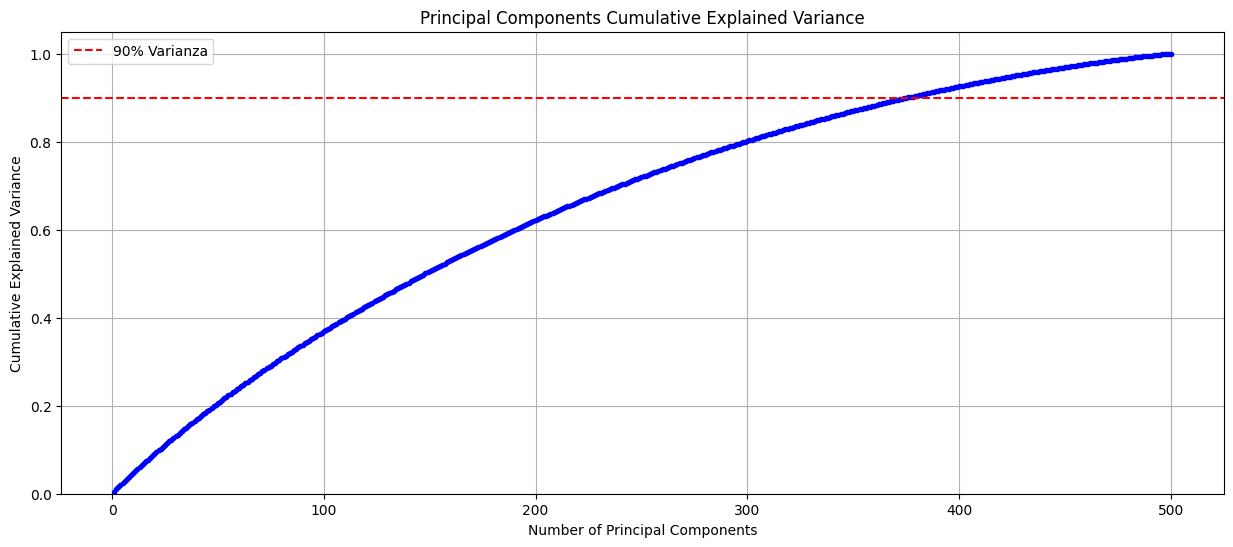

In [225]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')

plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Principal Components Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

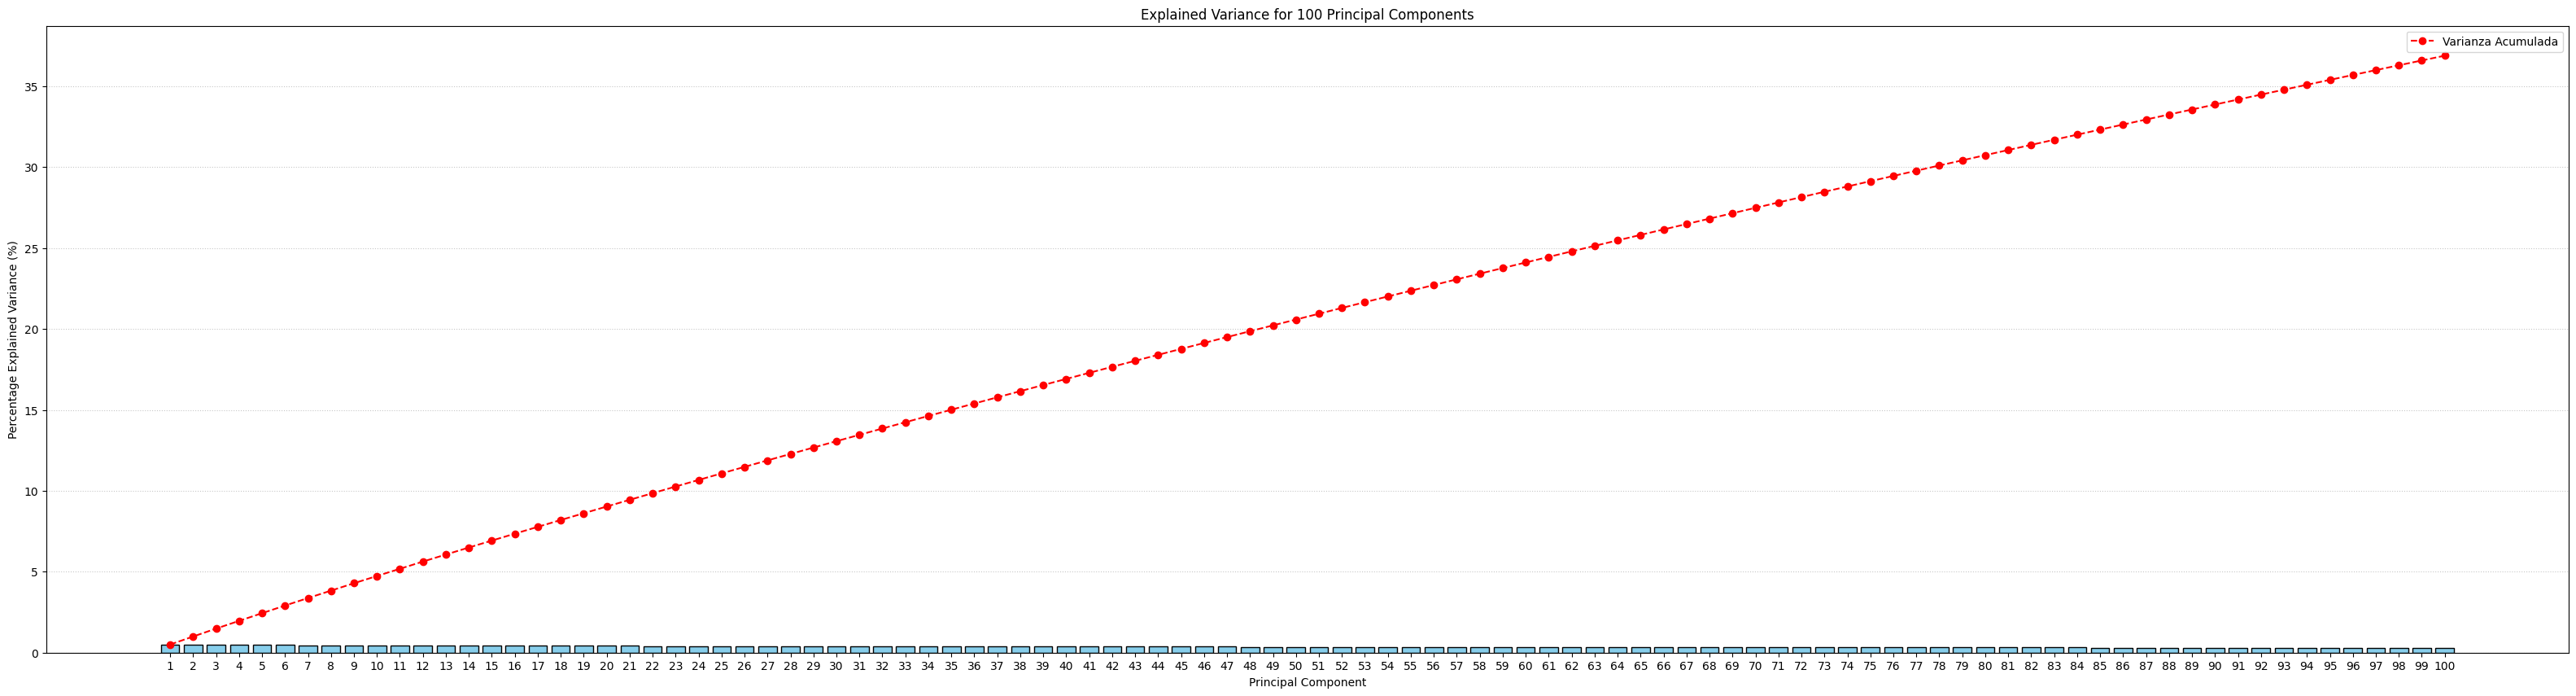

In [226]:
num_components_to_plot = 100
variances_to_plot = pca.explained_variance_ratio_[:num_components_to_plot] * 100

plt.figure(figsize=(40, 10))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [227]:
loadings = pd.DataFrame(
    pca.components_.T[:, :3],
    columns=['PC1', 'PC2', 'PC3'],
    index=df_genomics_strategy_1_gen.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2,PC3
Gen_1,-0.010131,0.073220,0.054703
Gen_2,0.020154,-0.041585,-0.013729
Gen_3,-0.010270,-0.042415,-0.000876
Gen_4,-0.006467,0.046259,0.020272
Gen_5,0.059833,-0.036262,0.009360
...,...,...,...
Gen_1996,0.000386,-0.016739,-0.035768
Gen_1997,-0.003168,-0.036876,-0.011607
Gen_1998,0.029956,0.024551,-0.011901
Gen_1999,0.017149,-0.034674,-0.020141


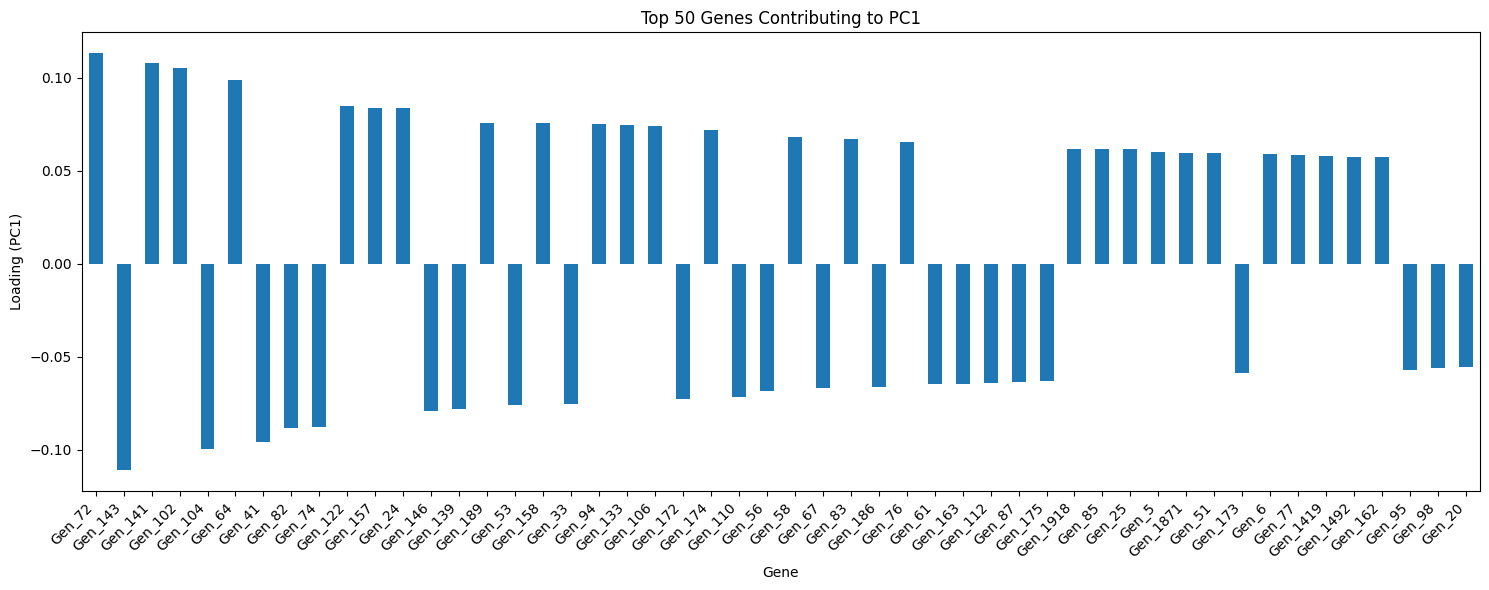

In [228]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:50, 0].plot(kind='bar')
plt.title('Top 50 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

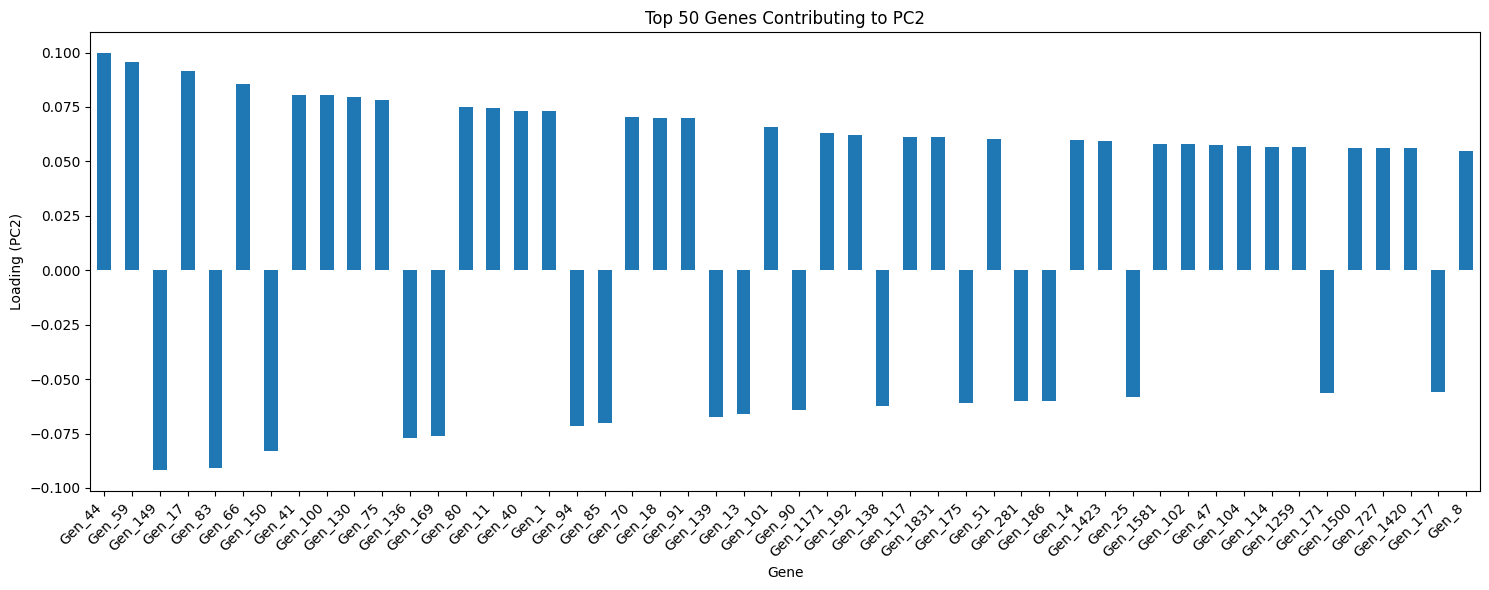

In [229]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:50, 1].plot(kind='bar')
plt.title('Top 50 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **The number of components whose explain_variance_ratio is greater than 0.004 was selected, approximately 50% would be the accumulated variance**

In [230]:
number_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.004])

loadings_top_components = pd.DataFrame(
    pca.components_.T[:, :number_components],
    columns=[f'PC{i+1}' for i in range(number_components)],
    index=df_genomics_strategy_1_gen.columns
)

loadings_top_components['Abs_Sum_Loadings'] = loadings_top_components.abs().sum(axis=1)

top_contributing_genes = loadings_top_components.sort_values(by='Abs_Sum_Loadings', ascending=False)

console.print(f"\nTop Genes Contributing Most to the First {number_components} Principal Components:")
display(top_contributing_genes.head())

Top Genes Contributing Most to the First 27 Principal Components:

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,Abs_Sum_Loadings
Gen_98,-0.056173,-0.035776,0.001959,-0.062614,0.054878,-0.070967,0.063838,-0.014149,-0.015980,-0.031819,...,0.034301,-0.005637,-0.022587,-0.051677,-0.014196,-0.019146,0.022325,-0.042577,0.059805,0.957758
Gen_177,-0.046860,-0.055782,-0.063852,0.067523,-0.015655,0.032599,0.021275,0.097692,0.059972,-0.015429,...,-0.007128,-0.024242,-0.027341,-0.029006,0.045433,0.039207,-0.032781,0.009319,0.060194,0.957422
Gen_9,0.038955,0.011321,-0.022437,-0.052645,-0.040651,-0.014804,-0.058078,-0.038392,0.034406,-0.008457,...,0.029946,-0.019449,-0.051080,0.035065,0.016733,-0.067999,0.076895,-0.011490,-0.009021,0.906188
Gen_121,0.025751,0.020269,0.053036,0.032963,-0.055271,0.016168,-0.026241,0.009960,-0.063438,0.061736,...,0.010652,-0.021971,-0.023799,-0.030019,-0.015193,0.006682,-0.018433,-0.005617,0.045916,0.902728
Gen_122,0.084652,0.012823,-0.043294,-0.005655,-0.045482,0.073885,0.091284,-0.030194,0.011498,0.076420,...,-0.016297,-0.021579,0.034467,0.003949,0.007623,-0.012833,0.023149,-0.037432,-0.026323,0.897316


### **let's take 200 gens more representative**

In [231]:
top_contributing_genes.iloc[:200, 0].index

Index(['Gen_98', 'Gen_177', 'Gen_9', 'Gen_121', 'Gen_122', 'Gen_17', 'Gen_69',
       'Gen_169', 'Gen_156', 'Gen_172',
       ...
       'Gen_130', 'Gen_30', 'Gen_50', 'Gen_175', 'Gen_864', 'Gen_227',
       'Gen_1751', 'Gen_1844', 'Gen_642', 'Gen_101'],
      dtype='object', length=200)

In [232]:
df_genomics_strategy_1_gen_200 = df_genomics_strategy_1_gen[top_contributing_genes.iloc[:200, 0].index]
df_genomics_strategy_1_gen_200 = df_genomics_strategy_1_gen_200.fillna(df_genomics_strategy_1_gen_200.mean())
df_genomics_strategy_1_gen_200.head()

,Gen_98,Gen_177,Gen_9,Gen_121,Gen_122,Gen_17,Gen_69,Gen_169,Gen_156,Gen_172,...,Gen_130,Gen_30,Gen_50,Gen_175,Gen_864,Gen_227,Gen_1751,Gen_1844,Gen_642,Gen_101
0,0.424256,0.515247,0.995133,0.030910,0.953536,0.113811,0.798207,0.366466,-0.728834,-1.098901,...,-0.443699,-2.486724,1.227723,0.954623,0.695264,-1.044067,0.788604,-0.048141,0.880938,3.447616
1,0.627331,1.038438,0.696335,-0.678042,1.497970,-0.637639,0.080068,0.443363,-0.770309,-0.814663,...,-0.629024,-2.548876,0.962045,0.776277,-0.438753,1.072849,1.848745,-1.124093,0.350589,3.851688
2,0.187318,0.349563,0.677335,-0.271083,0.858860,-0.026974,0.183619,0.187098,-1.373857,-1.218715,...,-0.423236,-2.864679,0.964923,1.196353,0.000956,1.312971,-1.115359,-0.708586,0.189935,2.797469
3,-0.110899,0.880738,0.636734,0.178011,1.303164,-0.518285,0.304452,-0.083394,-0.847875,-1.343299,...,-0.582117,-2.900704,1.229771,0.997188,-0.025734,-0.534089,-0.934226,1.263720,0.367045,3.453878
4,0.952945,0.567162,0.717442,0.293094,0.875833,-0.227937,0.343417,0.830031,-1.012801,-1.017695,...,-0.142566,0.161804,1.758446,0.616978,1.063889,0.435219,-0.330953,-0.296377,1.112725,3.195630


In [233]:
scaler = StandardScaler()
df_genomics_strategy_1_gen_200_scaled = scaler.fit_transform(df_genomics_strategy_1_gen_200)

In [234]:
pca = PCA()
pca_data = pca.fit_transform(df_genomics_strategy_1_gen_200_scaled)

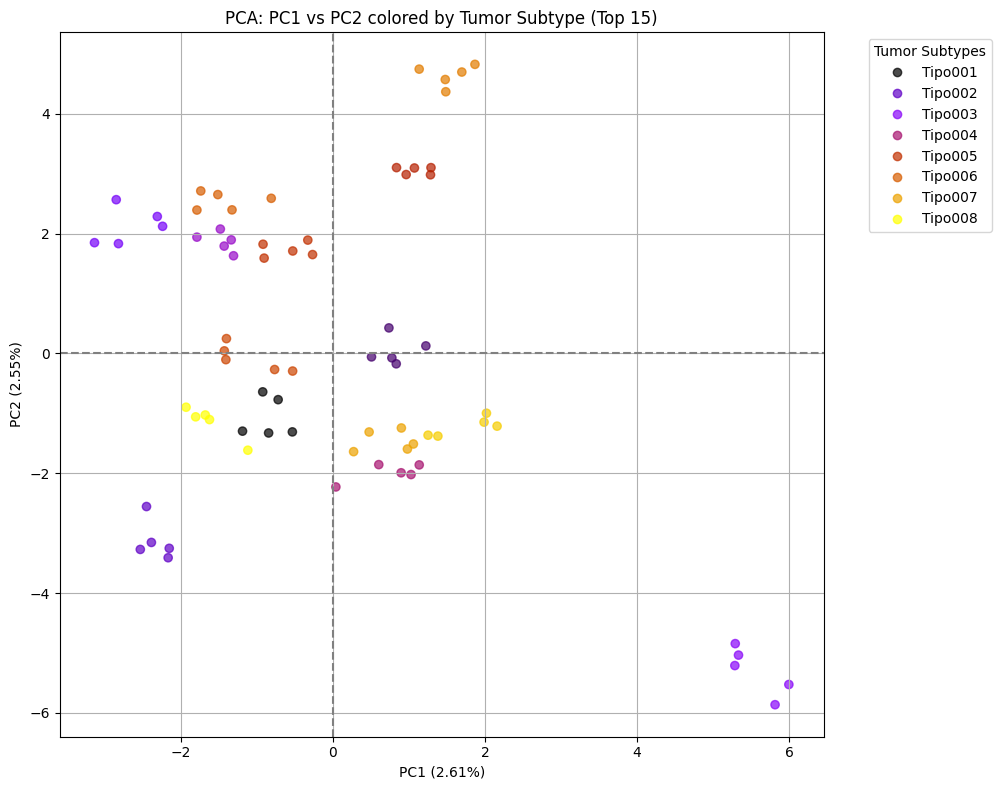

In [235]:
tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])

scores = pca_data[:, :2]

# Get the top 15 most frequent tumor subtypes for better visualization
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [236]:
import plotly.express as px

scores = pca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

scores = pca_data[:, :3]

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', 'y': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', 'z': f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions Mean**

- After performing the PCA, approximately 8 groups of tumor subtypes are observed where the PCA finds variance, that is, differences between them.
- There are some groups that share characteristics, not allowing them to be separated, approximately 7 groups
- PC1 has 2.61% of the total variability
- PC2 has 2.55% of the total variability
- There is a low explained variance with two components, **approximately 5.16%**


## **Strategy 2: Advanced Imputation (Robust Approach)**

- Using a more convenient method, impute missing values ​​using the k-Nearest Neighbors (k-NN) algorithm. Justify the choice of parameter k.
- Perform PCA on this new imputed data matrix.
- Generate a plot of PC1 vs. PC2, similar to the previous step.

In [237]:
df_genomics_strategy_2_gen_tumor = df_genomics_copy.drop(columns=['Muestra_ID'])
df_genomics_strategy_2_gen_tumor.head()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
0,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,NaN,-1.086151,0.995133,-1.753780,...,-0.043145,-0.111840,-0.375548,-0.528212,0.759602,-0.026776,-0.207460,-0.388127,1.968288,-1.681775
1,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,-1.582650,...,1.199829,2.141636,-0.066823,0.252472,1.212322,-0.998419,-0.540939,-0.630091,-0.617466,0.818629
2,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,-1.038886,...,-1.041196,1.455374,-0.463369,-0.304951,-0.087723,-0.266249,0.382303,-1.026754,-0.542969,-1.480541
3,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,-1.413743,...,0.116033,-2.503982,1.404051,2.276509,0.739348,1.173409,1.259947,-0.637688,0.502837,-2.114035
4,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,-1.033328,...,2.530071,-0.371028,-1.949529,1.374980,-0.520373,-1.265650,-0.227383,-0.253384,0.018274,-0.367521


In [238]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_copy.isna().sum().any() > 0}")

Are there NA fields? => True

In [239]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_2_gen_scaled = scaler.fit_transform(df_genomics_strategy_2_gen_tumor)

### **Evaluate the best K for KNN**

In [240]:
ks_to_evaluate = [2, 5, 10, 20, 30, 40, 50]
console.print(f"Evaluating the following k values for KNNImputer: {ks_to_evaluate}")

Evaluating the following k values for KNNImputer: [2, 5, 10, 20, 30, 40, 50]

In [241]:
from sklearn.impute import KNNImputer

explained_variance_ratios = []

# Iteration through k values
for k in ks_to_evaluate:
    knn_imputer = KNNImputer(n_neighbors=k)
    X_train_imputed = knn_imputer.fit_transform(df_genomics_strategy_2_gen_scaled)

    pca = PCA()
    pca.fit(X_train_imputed)
    explained_variance_ratios.append(pca.explained_variance_ratio_)

### **Evaluate Results**

Cumulative explained variance for different numbers of components:

For k = 2:

1 components: 0.0053

2 components: 0.0106

5 components: 0.0259

10 components: 0.0500

50 components: 0.2139

100 components: 0.3790

For k = 5:

1 components: 0.0053

2 components: 0.0105

5 components: 0.0255

10 components: 0.0494

50 components: 0.2119

100 components: 0.3765

For k = 10:

1 components: 0.0052

2 components: 0.0103

5 components: 0.0252

10 components: 0.0488

50 components: 0.2102

100 components: 0.3745

For k = 20:

1 components: 0.0051

2 components: 0.0102

5 components: 0.0249

10 components: 0.0484

50 components: 0.2090

100 components: 0.3731

For k = 30:

1 components: 0.0051

2 components: 0.0102

5 components: 0.0248

10 components: 0.0482

50 components: 0.2085

100 components: 0.3724

For k = 40:

1 components: 0.0051

2 components: 0.0101

5 components: 0.0248

10 components: 0.0481

50 components: 0.2082

100 components: 0.3721

For k = 50:

1 components: 0.0051

2 components: 0.0101

5 components: 0.0247

10 components: 0.0480

50 components: 0.2080

100 components: 0.3718

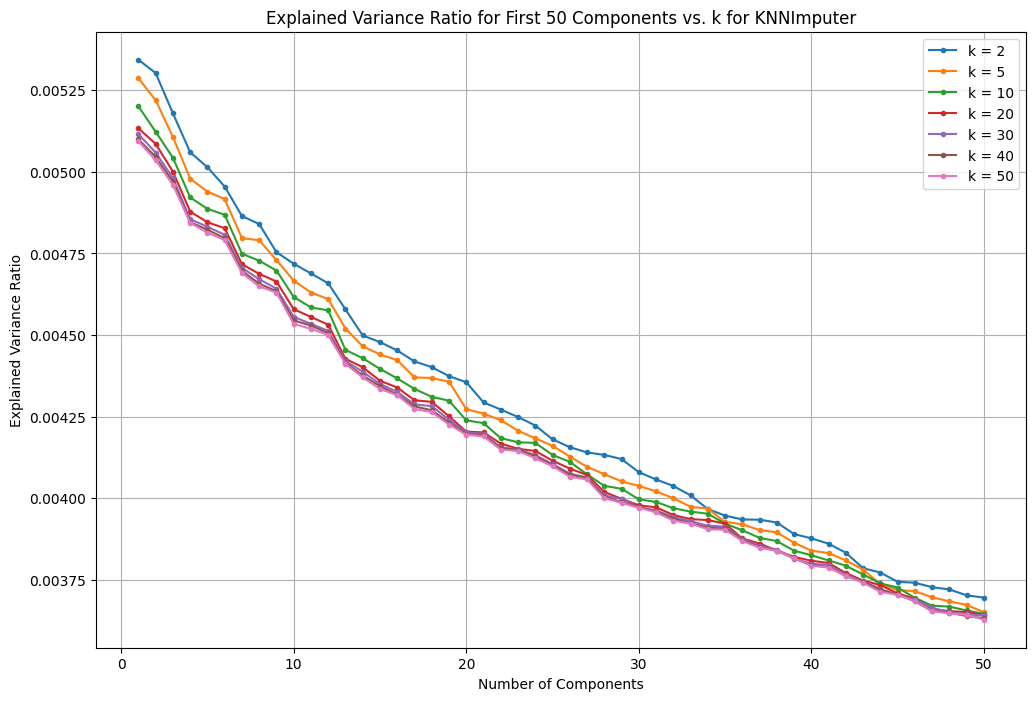

In [242]:
cumulative_explained_variances = []

console.print("Cumulative explained variance for different numbers of components:")

for i, ratios in enumerate(explained_variance_ratios):
    k = ks_to_evaluate[i]
    cumulative_variance = np.cumsum(ratios)
    cumulative_explained_variances.append(cumulative_variance)

    console.print(f"\nFor k = {k}:")
    components_to_print = [1, 2, 5, 10, 50, 100]
    for num_components in components_to_print:
        if num_components <= len(cumulative_variance):
            console.print(f"  {num_components} components: {cumulative_variance[num_components-1]:.4f}")
        else:
            console.print(f"  {num_components} components: More components than available ({len(cumulative_variance)})")

plt.figure(figsize=(12, 8))
for i, ratios in enumerate(explained_variance_ratios):
    k = ks_to_evaluate[i]
    plt.plot(range(1, min(len(ratios), 51)), ratios[:50], marker='.', linestyle='-', label=f'k = {k}')

plt.title('Explained Variance Ratio for First 50 Components vs. k for KNNImputer')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

### **K Value Conclusions**

- We selected K=2 because it offers good variation between components and computational performance should be better than with 10 or more.

In [243]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
df_genomics_strategy_2_gen_imputed = knn_imputer.fit_transform(df_genomics_strategy_2_gen_scaled)
df_genomics_strategy_2_gen_imputed = pd.DataFrame(df_genomics_strategy_2_gen_imputed, columns=df_genomics_strategy_2_gen_tumor.columns)

df_genomics_strategy_2_gen_imputed.head()

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
0,-0.727413,-0.756005,2.254893,-0.655750,-0.353750,-0.466506,1.341978,-0.809657,0.535817,-1.128151,...,-0.044529,-0.091582,-0.415637,-0.585570,0.785641,-0.085474,-0.228417,-0.425425,1.836772,-1.712793
1,-0.760030,-0.871996,2.015588,-0.294318,-0.009579,-0.901550,1.149779,-0.873225,0.348984,-1.015232,...,1.154316,2.213160,-0.104764,0.190242,1.234626,-1.121122,-0.567466,-0.671534,-0.626764,0.827331
2,-0.656728,-0.304901,1.934319,-0.611529,-0.258373,-0.683413,1.564876,-0.611402,0.337103,-0.656433,...,-1.007147,1.511286,-0.504069,-0.363702,-0.054693,-0.340723,0.371197,-1.074993,-0.555788,-1.508363
3,-0.516211,-0.494595,2.397833,-0.710852,-0.065132,-0.200601,1.374058,-0.929775,0.311715,-0.903779,...,0.108998,-2.538146,1.376348,2.201647,0.765554,1.193769,1.263500,-0.679262,0.440587,-2.151921
4,-0.705495,-0.562078,2.009427,-0.703890,-0.457065,-0.325499,1.309897,-0.547384,0.362181,-0.652765,...,2.437331,-0.356667,-2.000574,1.305744,-0.483772,-1.405955,-0.248672,-0.288374,-0.021072,-0.377662


In [244]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_strategy_2_gen_imputed.isna().sum().any() > 0}")

Are there NA fields? => False

In [245]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_2_gen_scaled = scaler.fit_transform(df_genomics_strategy_2_gen_imputed)

In [246]:
pca = PCA()
pca_data = pca.fit_transform(df_genomics_strategy_2_gen_scaled)

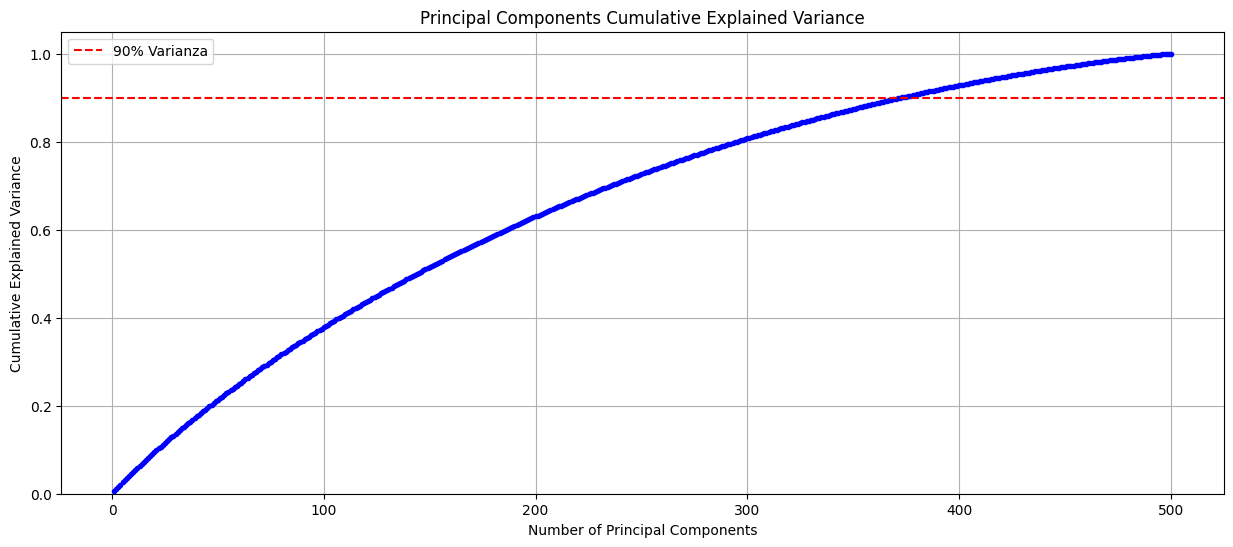

In [247]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Principal Components Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

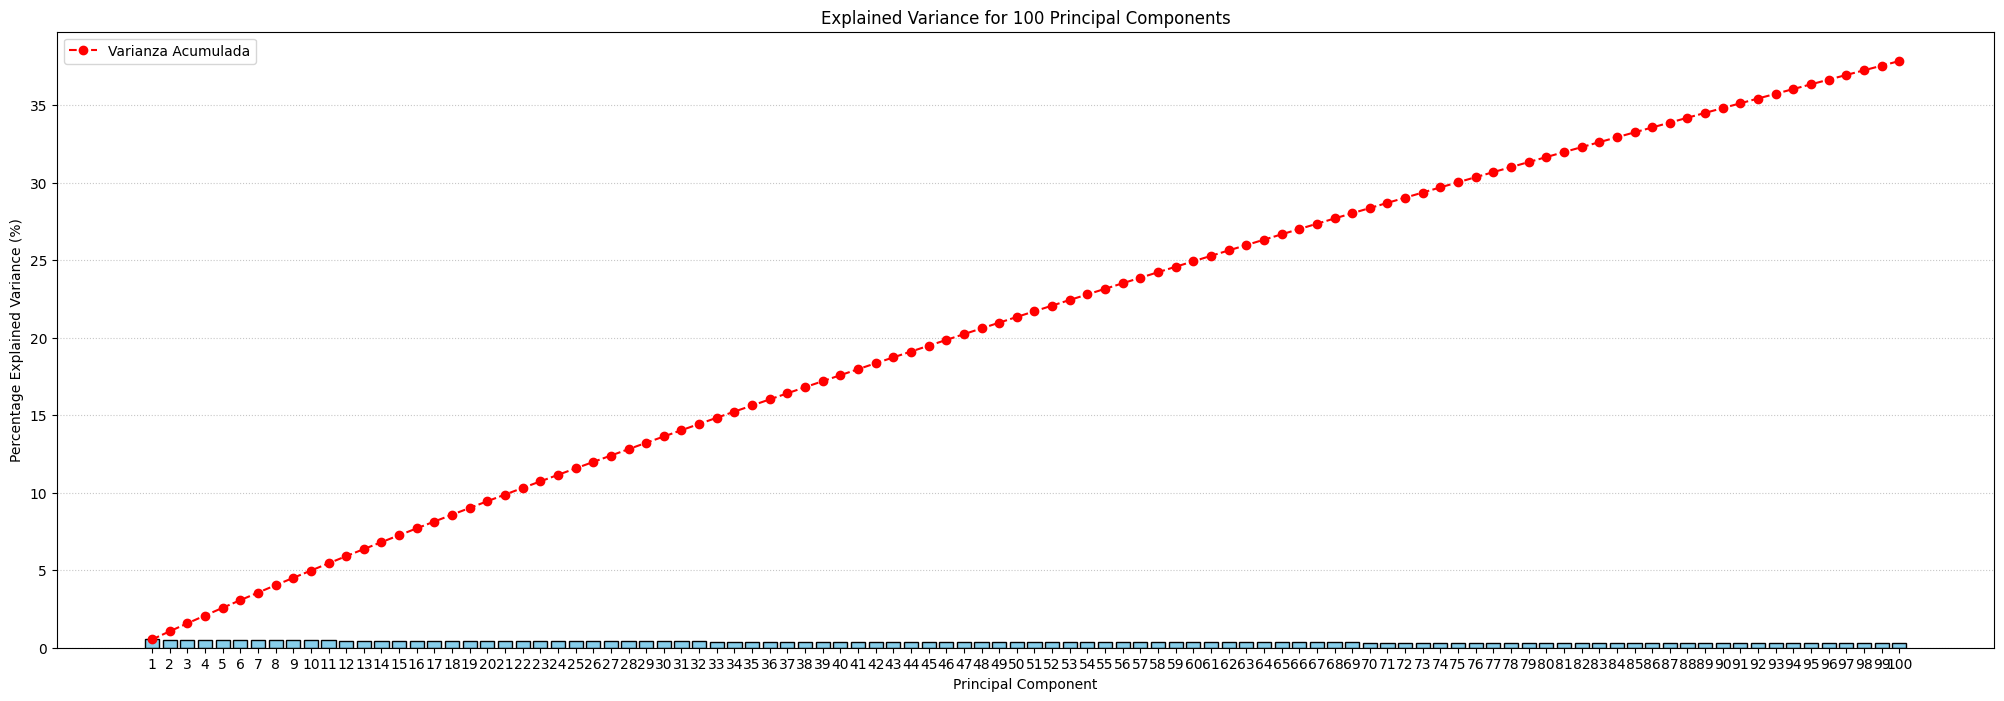

In [248]:
num_components_to_plot = 100
variances_to_plot = pca.explained_variance_ratio_[:num_components_to_plot] * 100

plt.figure(figsize=(25, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [249]:
loadings = pd.DataFrame(
    pca.components_.T[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_2_gen_tumor.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_1,0.003705,0.054090
Gen_2,0.006886,-0.039313
Gen_3,-0.023115,-0.020051
Gen_4,0.001247,0.045650
Gen_5,0.038954,-0.055636
...,...,...
Gen_1996,0.001679,-0.001732
Gen_1997,-0.018858,-0.006585
Gen_1998,0.034354,0.010798
Gen_1999,0.000179,-0.026709


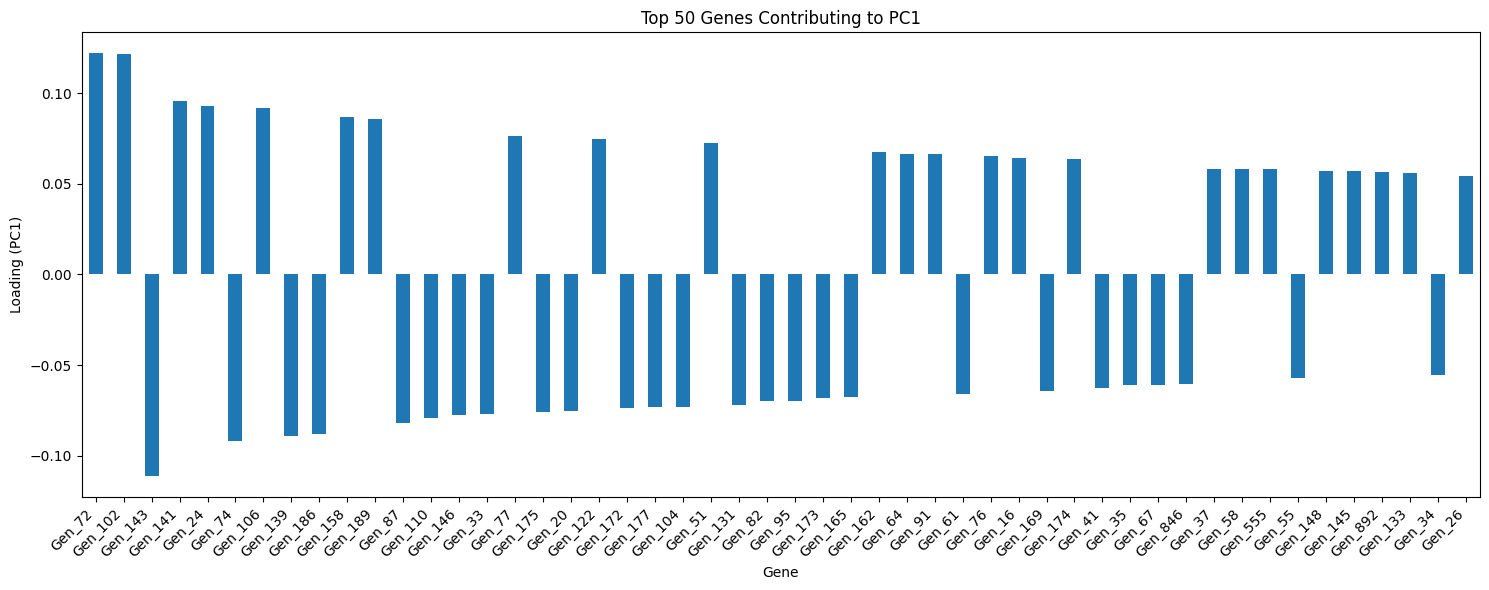

In [250]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:50, 0].plot(kind='bar')
plt.title('Top 50 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

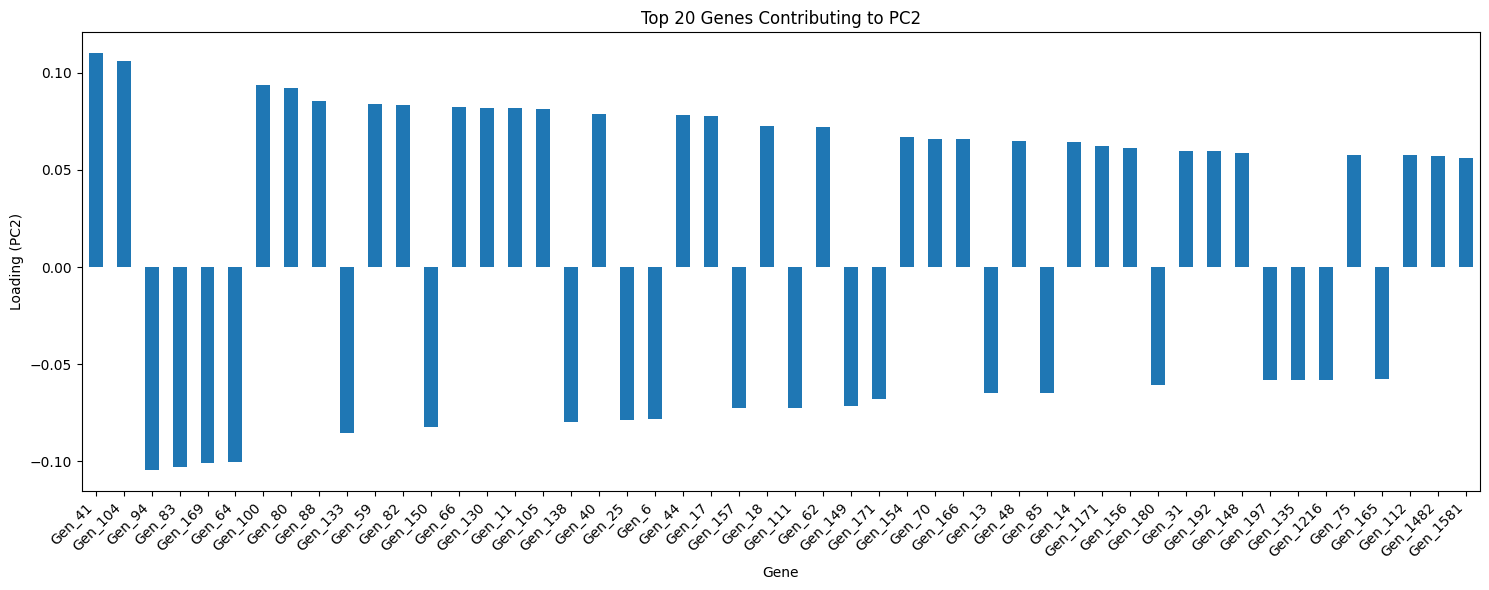

In [251]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:50, 1].plot(kind='bar')
plt.title('Top 20 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### **The number of components whose explain_variance_ratio is greater than 0.004 was selected, approximately 50% would be the accumulated variance**

In [252]:
number_components = len(pca.explained_variance_ratio_[pca.explained_variance_ratio_ > 0.004])

loadings_top_components = pd.DataFrame(
    pca.components_.T[:, :number_components],
    columns=[f'PC{i+1}' for i in range(number_components)],
    index=df_genomics_strategy_1_gen.columns
)

loadings_top_components['Abs_Sum_Loadings'] = loadings_top_components.abs().sum(axis=1)

top_contributing_genes = loadings_top_components.sort_values(by='Abs_Sum_Loadings', ascending=False)

console.print(f"\nTop Genes Contributing Most to the First {number_components} Principal Components:")
display(top_contributing_genes.head())

Top Genes Contributing Most to the First 33 Principal Components:

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,Abs_Sum_Loadings
Gen_131,-0.071995,0.012802,0.035620,-0.116877,0.029089,-0.027915,-0.039842,-0.046763,-0.030594,0.021110,...,-0.018730,-0.037416,-0.056097,0.043087,0.008227,-0.060454,0.026284,0.013412,0.037523,1.137918
Gen_161,-0.043223,0.048727,-0.020777,-0.060086,-0.022126,0.030669,-0.059510,0.013112,-0.057249,-0.061109,...,0.051514,0.010368,0.014345,0.014220,0.029899,0.033695,0.052233,-0.010609,-0.010702,1.130966
Gen_196,0.011301,-0.048719,0.019666,-0.006912,-0.020210,-0.020315,0.027951,-0.055528,0.077497,0.073613,...,-0.011584,-0.032477,0.051196,0.006961,0.025099,0.004360,0.086174,0.025829,-0.045827,1.115752
Gen_188,0.020108,0.026666,-0.049571,-0.011068,-0.003721,-0.077599,0.066219,0.027144,-0.028850,0.001045,...,0.033248,0.006555,-0.027248,-0.057419,0.026515,0.023056,-0.050452,-0.005505,0.062033,1.115010
Gen_183,-0.003919,-0.035607,0.010281,0.076359,-0.027689,0.060415,-0.079965,0.070313,0.017183,-0.018942,...,-0.001311,0.029931,-0.049351,-0.016821,0.019965,-0.054207,0.072493,-0.006119,0.027175,1.114471


### **let's take 200 gens more representative**

In [253]:
df_genomics_strategy_2_gen_200 = df_genomics_strategy_2_gen_tumor[top_contributing_genes.iloc[:200, 0].index]
df_genomics_strategy_2_gen_200.head()

,Gen_131,Gen_161,Gen_196,Gen_188,Gen_183,Gen_27,Gen_13,Gen_172,Gen_20,Gen_85,...,Gen_178,Gen_57,Gen_108,Gen_181,Gen_113,Gen_137,Gen_147,Gen_1743,Gen_72,Gen_934
0,-1.468956,-1.270554,-2.381379,0.175144,-0.578774,2.504872,1.350743,-1.098901,1.914028,0.436651,...,0.528548,-1.554492,2.618515,0.290706,-0.742267,0.183435,-0.325555,0.250130,0.313507,0.235324
1,-2.238297,-1.363453,-2.110287,0.092236,-0.741858,3.073669,1.448236,-0.814663,2.531588,1.015797,...,0.350779,-2.592973,2.982061,-0.053459,-0.403288,-0.149729,-0.773458,-1.273446,0.936987,0.342589
2,-2.153745,-1.715591,-2.565775,-0.702403,-1.067690,3.036233,1.054044,-1.218715,2.159356,0.855733,...,0.231030,-2.839455,2.318271,0.722752,-0.289787,NaN,-0.627565,2.337561,0.285468,1.000766
3,-2.301109,-1.348765,-2.794594,0.132190,-0.507512,1.966846,1.606245,-1.343299,2.288752,0.994352,...,0.364566,-2.628969,2.441324,0.508424,-0.802271,-0.119366,-0.335499,-1.625435,0.908542,0.036186
4,-2.123434,-1.981107,NaN,-0.425254,-0.991566,1.774964,1.401085,-1.017695,2.303590,0.559380,...,0.652589,-2.752691,2.500590,-0.019970,-0.076571,-0.412875,-0.477651,0.872138,0.685281,1.285359


In [254]:
scaler = StandardScaler()
df_genomics_strategy_2_gen_200_scaled = scaler.fit_transform(df_genomics_strategy_2_gen_200)

In [255]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
df_genomics_strategy_2_gen_imputed = knn_imputer.fit_transform(df_genomics_strategy_2_gen_200_scaled)
df_genomics_strategy_2_gen_imputed = pd.DataFrame(df_genomics_strategy_2_gen_imputed, columns=df_genomics_strategy_2_gen_200.columns)

df_genomics_strategy_2_gen_imputed.head()

,Gen_131,Gen_161,Gen_196,Gen_188,Gen_183,Gen_27,Gen_13,Gen_172,Gen_20,Gen_85,...,Gen_178,Gen_57,Gen_108,Gen_181,Gen_113,Gen_137,Gen_147,Gen_1743,Gen_72,Gen_934
0,-1.115589,-0.771290,-1.460334,0.318875,-0.312962,1.711863,0.958207,-0.784832,1.094054,0.237068,...,0.267588,-0.951724,1.626083,0.287263,-0.649740,0.129036,-0.092729,0.268608,0.294341,0.236472
1,-1.592344,-0.829993,-1.286777,0.267598,-0.420101,2.079524,1.025801,-0.602915,1.469140,0.581776,...,0.144333,-1.620130,1.850909,0.029788,-0.396149,-0.088114,-0.378170,-1.312255,0.759916,0.337689
2,-1.539948,-1.052510,-1.578386,-0.223863,-0.634157,2.055326,0.752499,-0.861515,1.243058,0.486506,...,0.061306,-1.778775,1.440404,0.610483,-0.311240,-0.065296,-0.285195,2.434526,0.273403,0.958755
3,-1.631268,-0.820712,-1.724878,0.292309,-0.266147,1.364091,1.135353,-0.941250,1.321649,0.569013,...,0.153892,-1.643298,1.516503,0.450141,-0.694628,-0.068324,-0.099066,-1.677479,0.738675,0.048563
4,-1.521164,-1.220291,-1.519360,-0.052455,-0.584147,1.240062,0.993111,-0.732859,1.330661,0.310116,...,0.353591,-1.722930,1.553155,0.054842,-0.151733,-0.259628,-0.189657,0.914004,0.571958,1.227302


In [256]:
pca = PCA()
pca_data = pca.fit_transform(df_genomics_strategy_2_gen_imputed)

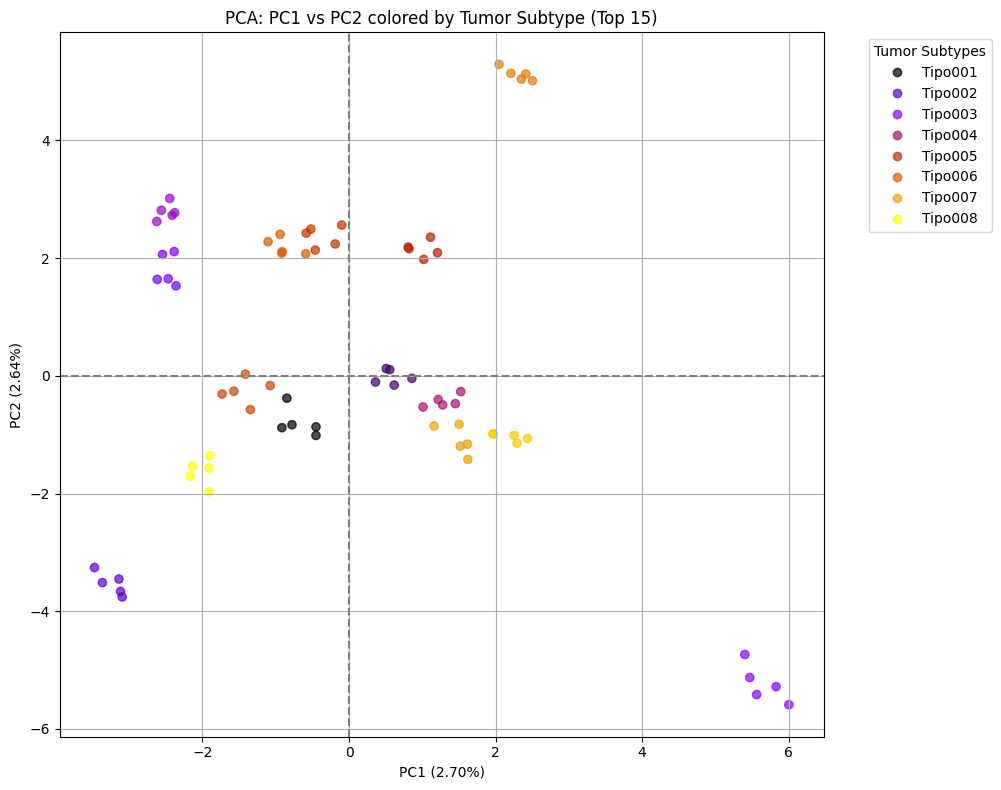

In [257]:
tumor_subtypes = df_genomics_copy['Muestra_ID'].apply(lambda x: x.split('_')[0])

scores = pca_data[:, :2]

# Get the top 15 most frequent tumor subtypes for better visualization
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [258]:
import plotly.express as px

scores = pca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

scores = pca_data[:, :3]

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', 'y': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', 'z': f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions K-NN**

-We can observe different clusters per tumor, meaning that there are genes that may differ between tumors, allowing them to be separated and identified.
- Some tumor clusters are divided into several parts but are separated from other tumors.
- PC1 represents 2.70% of the total variability.
- PC2 represents 2.64% of the total variability.
- PC3 represents 2.59% of the total variability.
- The explained variance is low in the first two components, but we can still observe clustering between tumor subtypes.
- The explained variance with two components is low, approximately 5.34%.
- Compared to the previous strategy, we can observe better clustering of all tumor subtypes.


## **Strategy 3: Integrated PCA (Advanced)**

- Use an alternative to the data-available principle (e.g., Bioconductor's pcaMethods) to run a PCA algorithm that natively handles missing values, such as Probabilistic PCA (PPCA) or NIPALS.
- Generate the PC1 vs. PC2 plot directly from the results of this method.
- **It's important to mention that the NIPAL and PPCA methods are neither native nor built into Python. The NIPAL methods had to be implemented from scratch using AI, and PPCA has a third-party library; however, it is not recognized nor part of a widely used library in the Python community.**

In [259]:
df_genomics_strategy_3_gen_tumor = df_genomics_copy.drop(columns=['Muestra_ID'])
df_genomics_strategy_3_gen_tumor

,Gen_1,Gen_2,Gen_3,Gen_4,Gen_5,Gen_6,Gen_7,Gen_8,Gen_9,Gen_10,...,Gen_1991,Gen_1992,Gen_1993,Gen_1994,Gen_1995,Gen_1996,Gen_1997,Gen_1998,Gen_1999,Gen_2000
0,-0.926129,-1.299938,3.486351,-1.102222,-0.428913,-0.747000,NaN,-1.086151,0.995133,-1.753780,...,-0.043145,-0.111840,-0.375548,-0.528212,0.759602,-0.026776,-0.207460,-0.388127,1.968288,-1.681775
1,-0.972536,-1.477558,3.135393,-0.524263,0.094519,-1.368749,1.573978,-1.184006,0.696335,-1.582650,...,1.199829,2.141636,-0.066823,0.252472,1.212322,-0.998419,-0.540939,-0.630091,-0.617466,0.818629
2,-0.825555,-0.609148,3.016207,-1.031508,-0.283858,-1.056996,2.222693,-0.780960,0.677335,-1.038886,...,-1.041196,1.455374,-0.463369,-0.304951,-0.087723,-0.266249,0.382303,-1.026754,-0.542969,-1.480541
3,-0.625623,-0.899633,3.695983,-1.190333,0.010032,-0.366977,1.924482,-1.271057,0.636734,-1.413743,...,0.116033,-2.503982,1.404051,2.276509,0.739348,1.173409,1.259947,-0.637688,0.502837,-2.114035
4,-0.894942,-1.002972,3.126358,-1.179200,-0.586038,-0.545477,1.824211,-0.682414,0.717442,-1.033328,...,2.530071,-0.371028,-1.949529,1.374980,-0.520373,-1.265650,-0.227383,-0.253384,0.018274,-0.367521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-2.044458,-1.947307,2.222913,-0.426984,0.696481,2.287694,-2.338079,1.255258,0.653233,-0.404246,...,0.591893,-1.150928,0.684457,0.324639,0.674785,-0.115513,0.434407,-1.381843,-0.103489,-0.369347
496,-1.672726,-2.088202,2.081054,-0.885337,0.947018,2.818235,-2.480211,1.662084,0.791437,-0.366129,...,-1.091032,0.689359,0.108528,1.333013,0.246010,-0.887565,-0.541282,1.537321,0.546592,0.235789
497,-1.405426,-2.098299,1.336024,-0.757675,NaN,2.390432,-2.371081,0.370994,0.199872,0.392915,...,0.425308,1.542432,1.180473,-1.172500,0.782788,-1.266124,1.077288,0.010492,-0.776267,0.452199
498,-1.075570,-1.477698,1.651338,-0.608227,0.143973,2.948940,-2.656643,0.551182,0.034984,-0.207469,...,-1.858875,0.524434,0.959642,-0.896875,0.502522,-0.459178,-0.518012,0.171262,0.270674,0.357772


In [260]:
# There are NA fields
console.print(f"Are there NA fields? => {df_genomics_strategy_3_gen_tumor.isna().sum().any() > 0}")

Are there NA fields? => True

### **let's take 200 gens more representative from previous models because using 2000 gens don't converge**

In [261]:
df_genomics_strategy_3_gen_200 = df_genomics_strategy_3_gen_tumor[top_contributing_genes.iloc[:200, 0].index]
df_genomics_strategy_3_gen_200.head()

,Gen_131,Gen_161,Gen_196,Gen_188,Gen_183,Gen_27,Gen_13,Gen_172,Gen_20,Gen_85,...,Gen_178,Gen_57,Gen_108,Gen_181,Gen_113,Gen_137,Gen_147,Gen_1743,Gen_72,Gen_934
0,-1.468956,-1.270554,-2.381379,0.175144,-0.578774,2.504872,1.350743,-1.098901,1.914028,0.436651,...,0.528548,-1.554492,2.618515,0.290706,-0.742267,0.183435,-0.325555,0.250130,0.313507,0.235324
1,-2.238297,-1.363453,-2.110287,0.092236,-0.741858,3.073669,1.448236,-0.814663,2.531588,1.015797,...,0.350779,-2.592973,2.982061,-0.053459,-0.403288,-0.149729,-0.773458,-1.273446,0.936987,0.342589
2,-2.153745,-1.715591,-2.565775,-0.702403,-1.067690,3.036233,1.054044,-1.218715,2.159356,0.855733,...,0.231030,-2.839455,2.318271,0.722752,-0.289787,NaN,-0.627565,2.337561,0.285468,1.000766
3,-2.301109,-1.348765,-2.794594,0.132190,-0.507512,1.966846,1.606245,-1.343299,2.288752,0.994352,...,0.364566,-2.628969,2.441324,0.508424,-0.802271,-0.119366,-0.335499,-1.625435,0.908542,0.036186
4,-2.123434,-1.981107,NaN,-0.425254,-0.991566,1.774964,1.401085,-1.017695,2.303590,0.559380,...,0.652589,-2.752691,2.500590,-0.019970,-0.076571,-0.412875,-0.477651,0.872138,0.685281,1.285359


In [262]:
# Standard Scaler
scaler = StandardScaler()
df_genomics_strategy_3_gen_scaled = scaler.fit_transform(df_genomics_strategy_3_gen_200)

### **NIPALS (Nonlinear Iterative Partial Least Squares)**

Don't pad NaNs directly: just skip or partially adjust them at each step



In [263]:
#Create with GPT because there is no library for NIPAL with Python
import numpy as np

class PCA_NIPALS:
    def __init__(self, n_components=2, tol=1e-6, max_iter=500, center=True, scale=False):
        """
        Implementación de PCA mediante el algoritmo NIPALS.
        Similar a pcaMethods(method="nipals") en Bioconductor.
        """
        self.n_components = n_components
        self.tol = tol
        self.max_iter = max_iter
        self.center = center
        self.scale = scale

    def fit(self, X):
        X = np.array(X, dtype=float)
        self.n, self.p = X.shape

        self.mean_ = np.nanmean(X, axis=0)
        self.std_ = np.nanstd(X, axis=0, ddof=1)
        Xh = X.copy()

        if self.center:
            Xh -= self.mean_
        if self.scale:
            Xh /= self.std_

        T = np.zeros((self.n, self.n_components))
        P = np.zeros((self.p, self.n_components))
        explained_variance = np.zeros(self.n_components)

        for i in range(self.n_components):
            col_var = np.nanvar(Xh, axis=0)
            t = Xh[:, np.nanargmax(col_var)].copy().reshape(-1, 1)

            for iteration in range(self.max_iter):
                # p = X' * t / (t' * t)
                p_num = np.nansum(Xh * t, axis=0)
                p_den = np.nansum(t ** 2)
                p = p_num / p_den
                p = p / np.sqrt(np.nansum(p ** 2))
                p = p.reshape(-1, 1)

                # t_new = X * p / (p' * p)
                t_new_num = np.nansum(Xh * p.T, axis=1)
                t_new_den = np.nansum(p ** 2)
                t_new = (t_new_num / t_new_den).reshape(-1, 1)

                if np.linalg.norm(t_new - t) < self.tol:
                    break
                t = t_new

            T[:, i] = t.ravel()
            P[:, i] = p.ravel()
            explained_variance[i] = np.nanvar(t)

            Xh = Xh - t @ p.T

        total_var = np.nansum(np.nanvar(X - (self.mean_ if self.center else 0), axis=0))
        self.explained_variance_ratio_ = explained_variance / total_var

        self.T_ = T
        self.P_ = P
        self.X_reconstructed_ = self.inverse_transform()

        return self

    def transform(self, X):
        X = np.array(X, dtype=float)
        if self.center:
            X -= self.mean_
        if self.scale:
            X /= self.std_
        return np.dot(X, self.P_)

    def inverse_transform(self, T=None):
        if T is None:
            T = self.T_
        X_rec = np.dot(T, self.P_.T)
        if self.center:
            X_rec += self.mean_
        if self.scale:
            X_rec *= self.std_
        return X_rec


In [264]:
pca = PCA_NIPALS(n_components=200)
pca.fit(df_genomics_strategy_3_gen_scaled)
pca_data = pca.T_

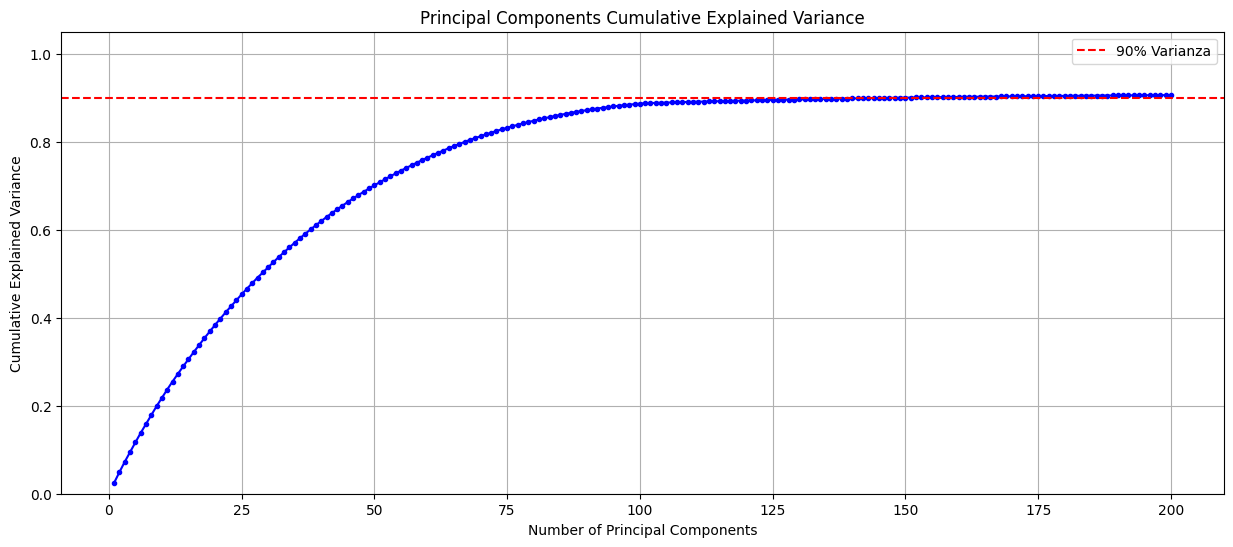

In [265]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Principal Components Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

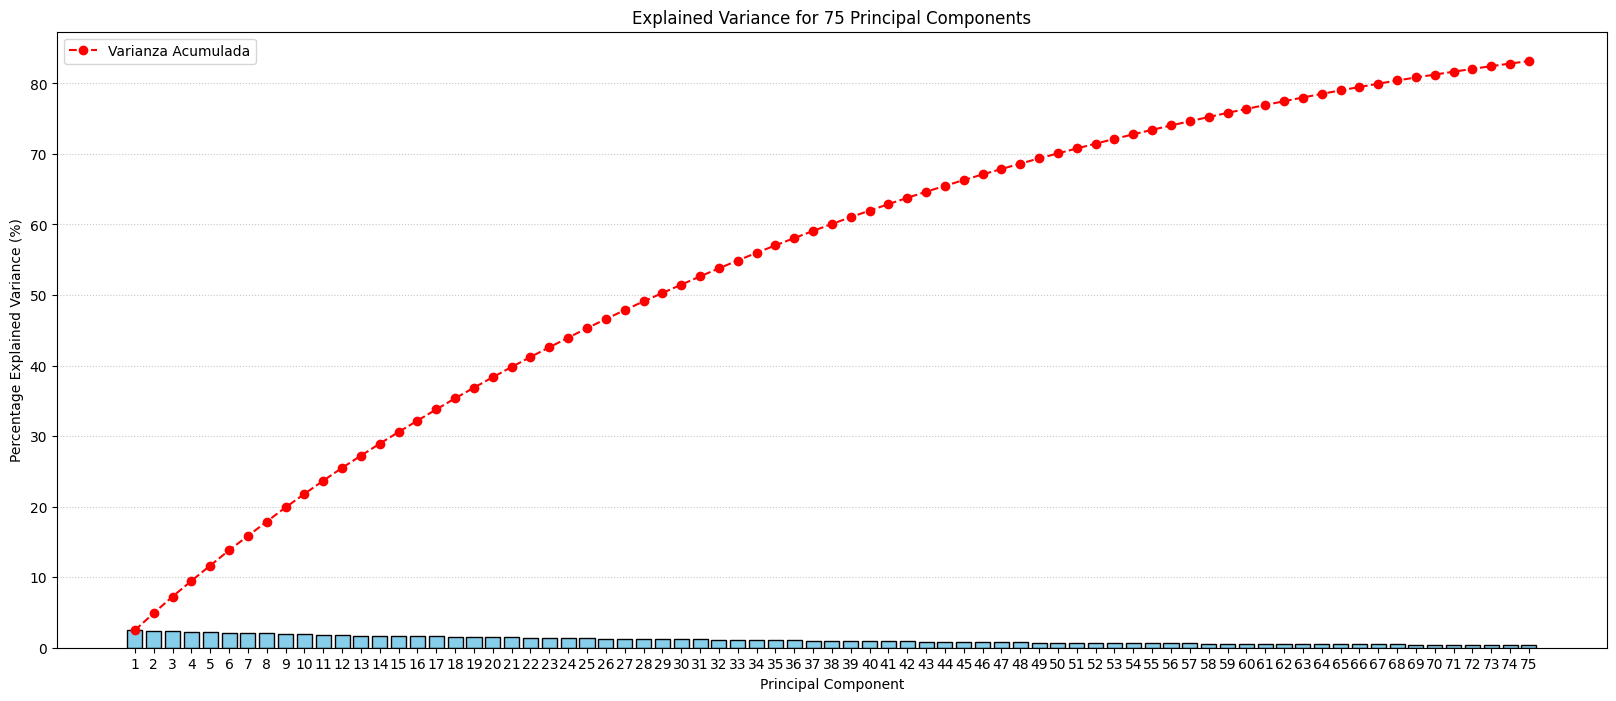

In [266]:
num_components_to_plot = 75
variances_to_plot = pca.explained_variance_ratio_[:num_components_to_plot] * 100

plt.figure(figsize=(20, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [267]:
loadings = pd.DataFrame(
    pca.P_[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_3_gen_200.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_131,0.014215,-0.119137
Gen_161,0.043419,-0.121140
Gen_196,-0.017251,0.086337
Gen_188,-0.098707,-0.047964
Gen_183,0.087421,0.135560
...,...,...
Gen_137,0.025228,0.001338
Gen_147,-0.055454,-0.029678
Gen_1743,0.030252,-0.015894
Gen_72,-0.037414,0.084987


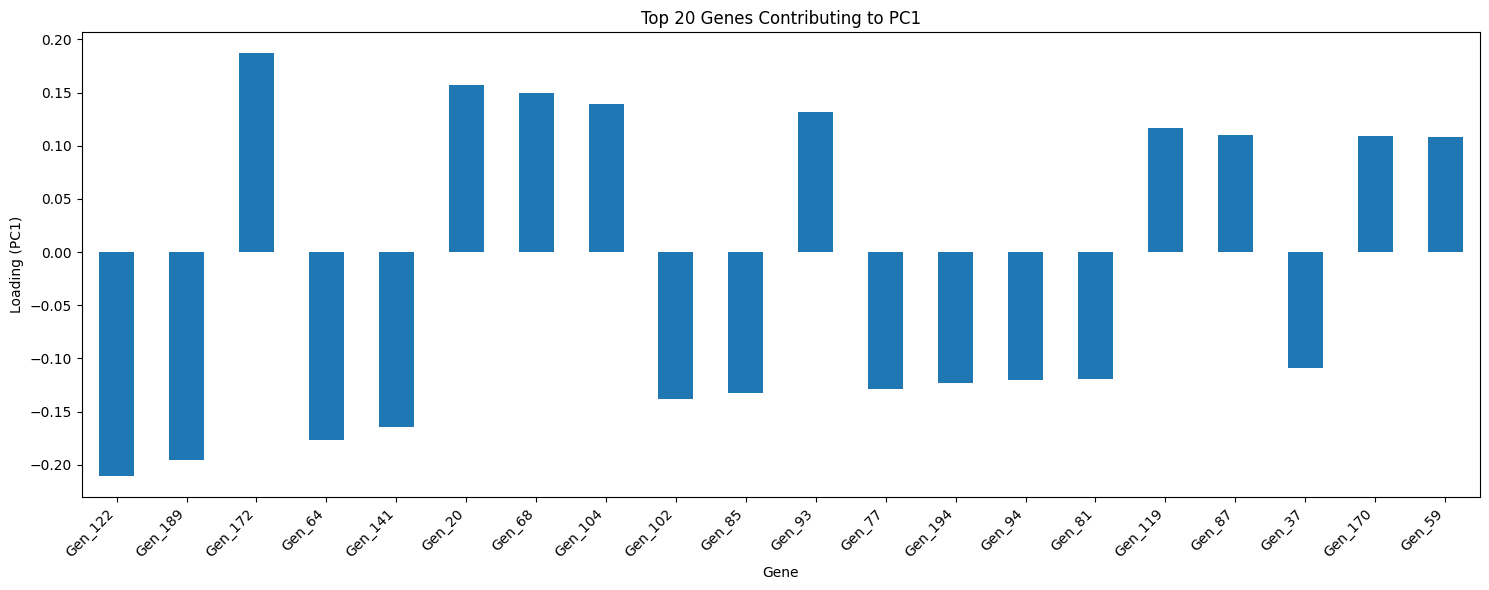

In [268]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:20, 0].plot(kind='bar')
plt.title('Top 20 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

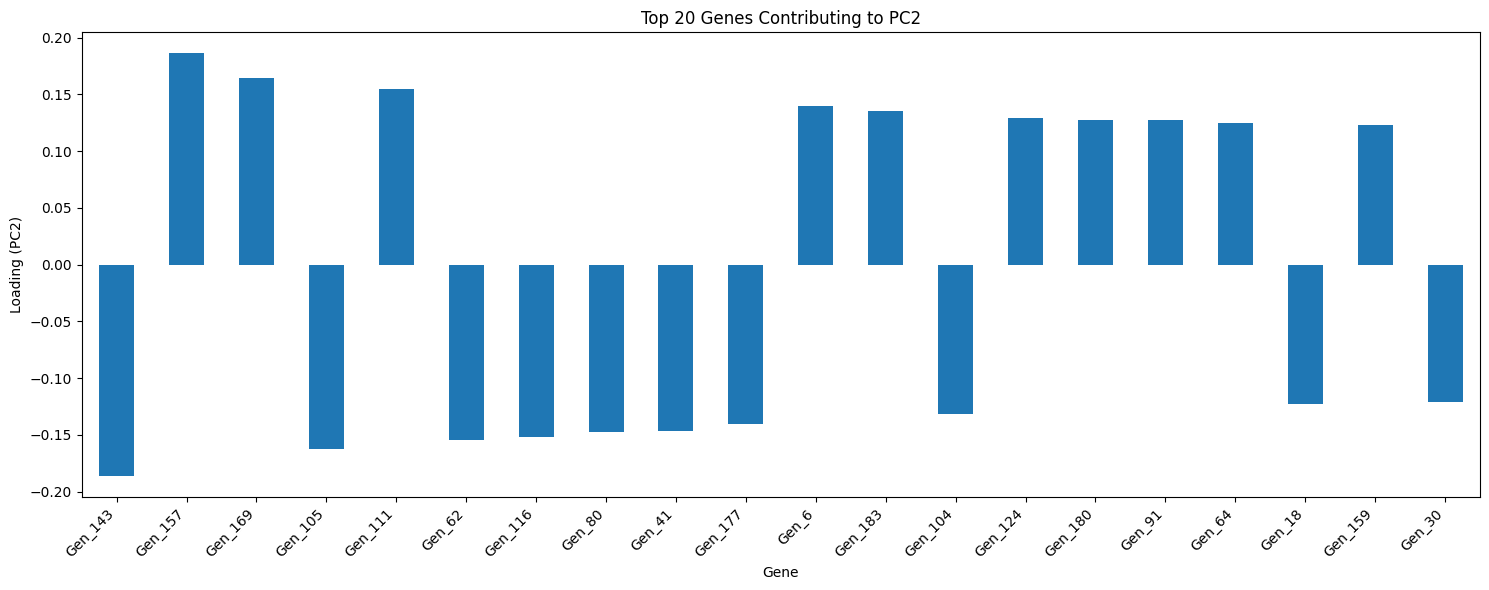

In [269]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:20, 1].plot(kind='bar')
plt.title('Top 20 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

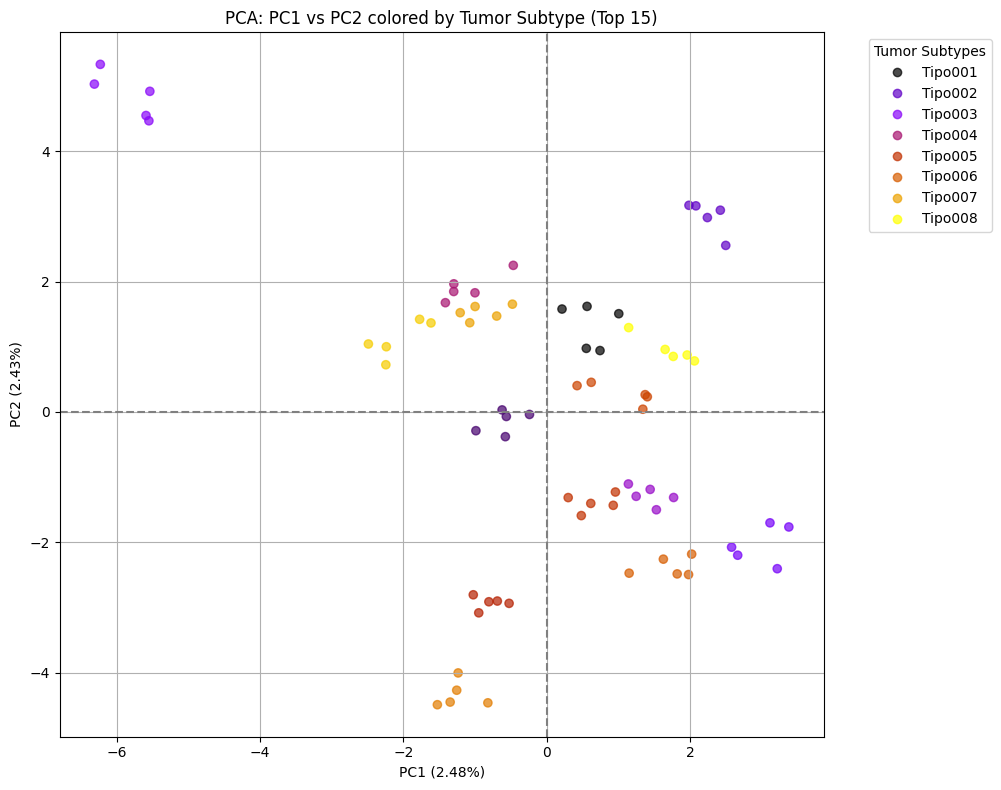

In [270]:
tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])

scores = pca_data[:, :2]

top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [271]:
import plotly.express as px

scores = pca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

scores = pca_data[:, :3]

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({pca.explained_variance_ratio_[0]:.2%})', 'y': f'PC2 ({pca.explained_variance_ratio_[1]:.2%})', 'z': f'PC3 ({pca.explained_variance_ratio_[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions NIPALs**

- We can observe different clusters by tumor subtype, meaning that there are genes that may differ between tumors, allowing them to be separated and identified.
- Some clusters by tumor subtype are divided into several parts of the plane, but are separated from other tumors.
- PC1 represents 2.49% of the total variability.
- PC2 represents 2.42% of the total variability.
- PC3 represents 2.35% of the total variability.
- The explained variance is low in the first two components, but we can still observe clusters between tumor subtypes.
- The explained variance with two components is low, approximately 4.91%.
- Components PC1 and PC2 present less variance than the previous strategies.
- Compared to the previous strategy, the clustering is good, but not better.
- There is no a official library for NIPALs with Python

### **PPCA**

- Handles missing values ​​naturally.

- Allows for probabilistically inferring principal components and reconstructing data.

In [272]:
!pip install ppca

In [273]:
from ppca import PPCA

ppca = PPCA()
ppca.fit(data=df_genomics_strategy_3_gen_scaled)
ppca_data = ppca.transform()

/usr/local/lib/python3.12/dist-packages/ppca/_ppca.py:82: RuntimeWarning:

divide by zero encountered in log



In [274]:
explained_values_ppca = ppca.eig_vals / np.sum(ppca.eig_vals)

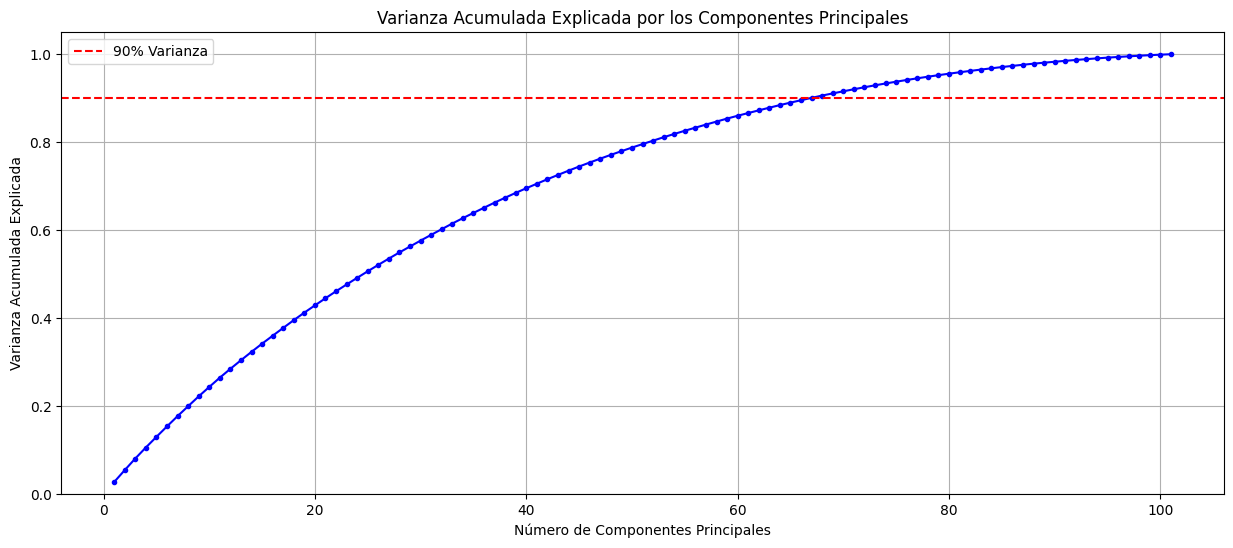

In [275]:
cumulative_variance = np.cumsum(explained_values_ppca)

plt.figure(figsize=(15, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='.', linestyle='-', color='blue')
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Varianza')
plt.title("Varianza Acumulada Explicada por los Componentes Principales")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Acumulada Explicada")
plt.grid(True)
plt.legend()
plt.ylim(0, 1.05)
plt.show()

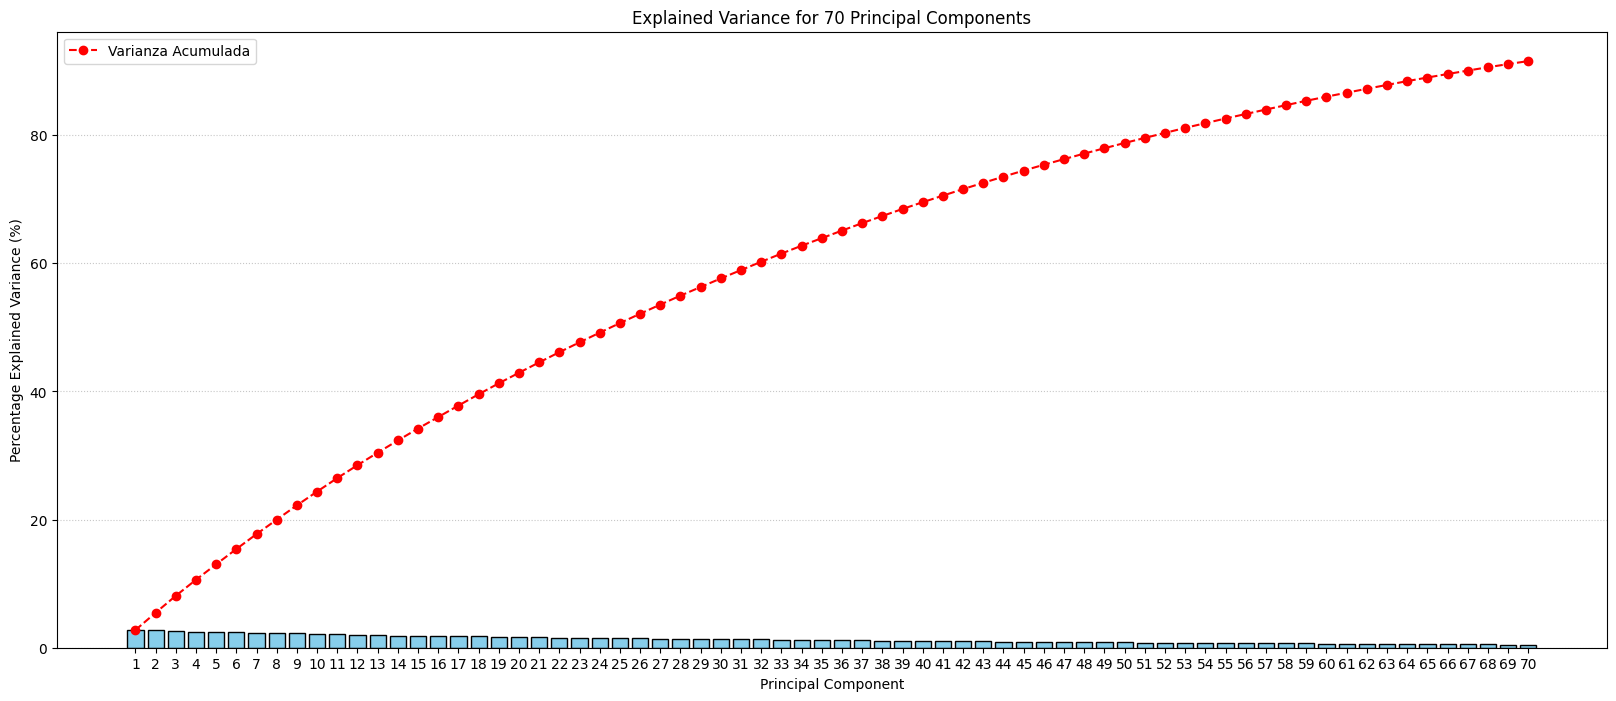

In [276]:
num_components_to_plot = 70
variances_to_plot = explained_values_ppca[:num_components_to_plot] * 100

plt.figure(figsize=(20, 8))

plt.bar(range(1, num_components_to_plot + 1), variances_to_plot,
        color='skyblue', edgecolor='black')

plt.plot(range(1, num_components_to_plot + 1),
         cumulative_variance[:num_components_to_plot] * 100,
         marker='o',
         linestyle='--', color='red',
         label='Varianza Acumulada')

plt.title(f'Explained Variance for {num_components_to_plot} Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percentage Explained Variance (%)')
plt.xticks(range(1, num_components_to_plot + 1))
plt.grid(axis='y', linestyle=':', alpha=0.7)
plt.legend()
plt.show()

In [277]:
loadings = pd.DataFrame(
    ppca.C[:, :2], # Tomamos solo los 2 primeros componentes
    columns=['PC1', 'PC2'],
    index=df_genomics_strategy_2_gen_200.columns
)
console.print("\nLoadings (contribución de cada gen) para PC1 y PC2:")
loadings

Loadings (contribución de cada gen) para PC1 y PC2:

,PC1,PC2
Gen_131,0.030645,0.101388
Gen_161,0.046974,0.121261
Gen_196,-0.000958,-0.110164
Gen_188,-0.111111,0.013512
Gen_183,0.100558,-0.115442
...,...,...
Gen_137,0.013215,0.001773
Gen_147,-0.057785,0.048034
Gen_1743,0.034897,0.010930
Gen_72,-0.034658,-0.024107


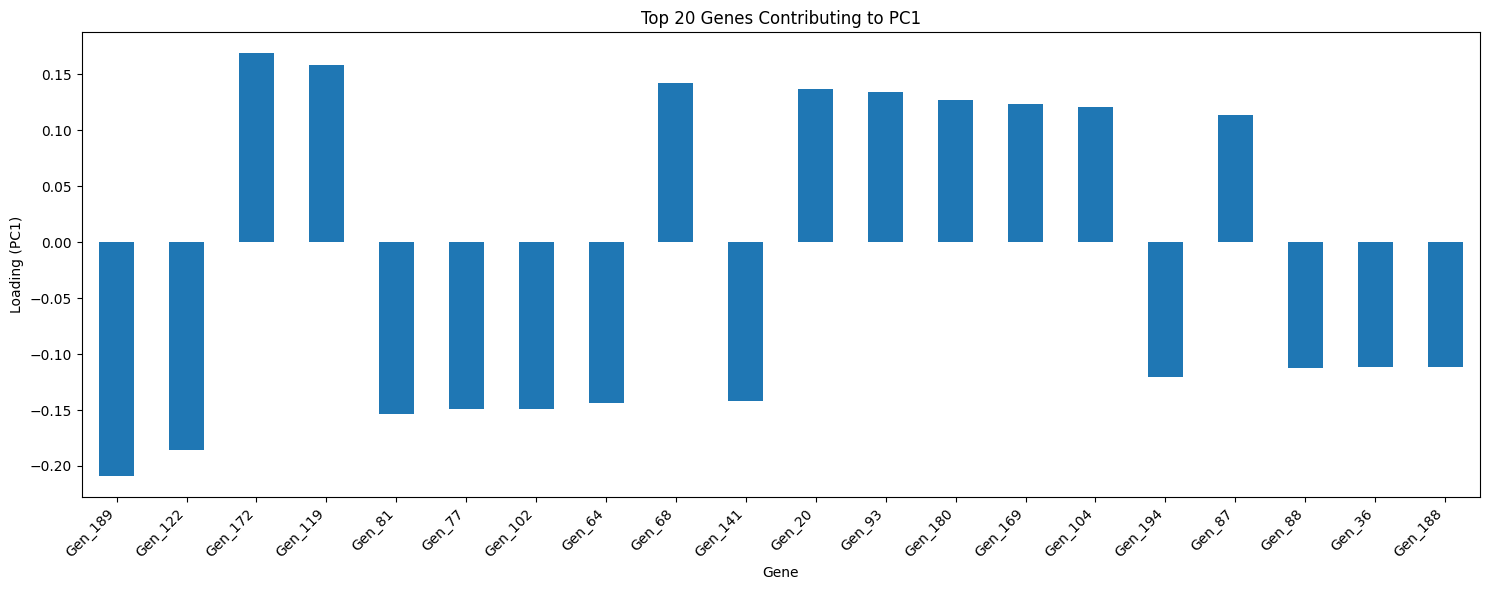

In [278]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC1'].abs().sort_values(ascending=False).index).iloc[:20, 0].plot(kind='bar')
plt.title('Top 20 Genes Contributing to PC1')
plt.xlabel('Gene')
plt.ylabel('Loading (PC1)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

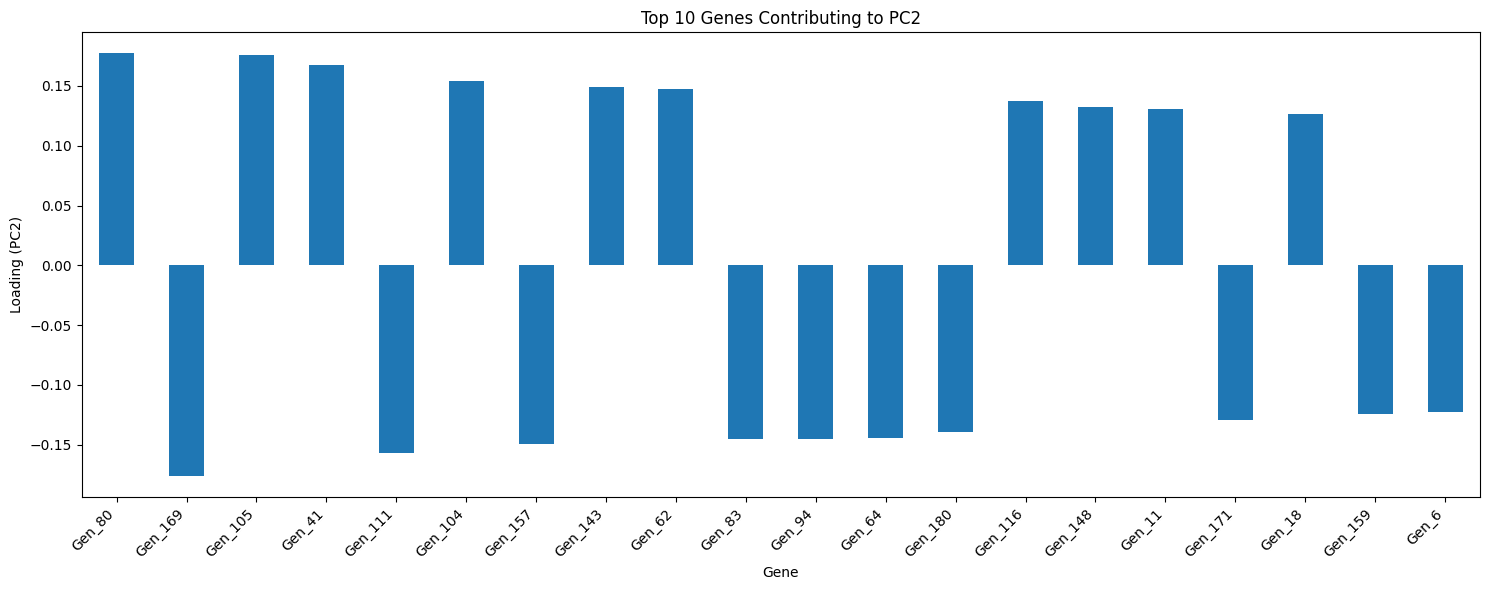

In [279]:
plt.figure(figsize=(15, 6))
loadings.reindex(loadings['PC2'].abs().sort_values(ascending=False).index).iloc[:20, 1].plot(kind='bar')
plt.title('Top 10 Genes Contributing to PC2')
plt.xlabel('Gene')
plt.ylabel('Loading (PC2)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

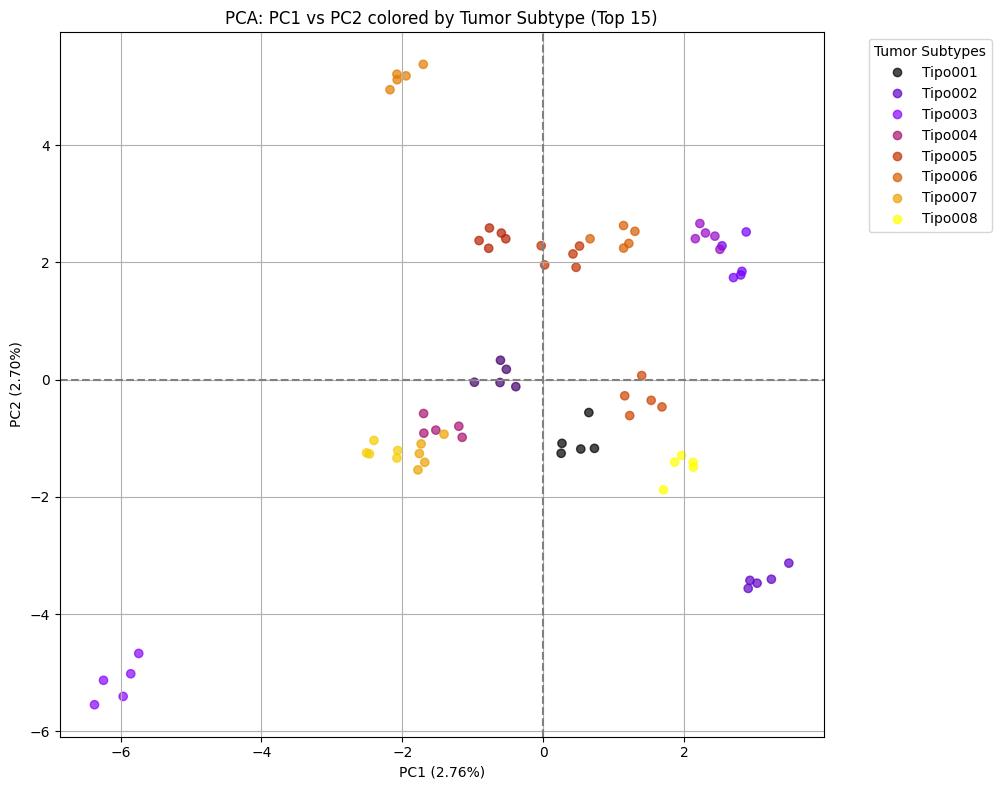

In [280]:
tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])

scores = ppca_data[:, :2]

# Get the top 15 most frequent tumor subtypes for better visualization
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(scores_filtered[:, 0], scores_filtered[:, 1], c=tumor_subtypes_filtered.astype('category').cat.codes, cmap='gnuplot', alpha=0.7)

plt.title('PCA: PC1 vs PC2 colored by Tumor Subtype (Top 15)')
plt.xlabel(f'PC1 ({explained_values_ppca[0]:.2%})')
plt.ylabel(f'PC2 ({explained_values_ppca[1]:.2%})')
plt.grid(True)
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')

legend_labels = top_subtypes
handles, _ = scatter.legend_elements()
legend = plt.legend(handles, legend_labels, title="Tumor Subtypes", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

In [281]:
import plotly.express as px

scores = ppca_data[:, :3]

tumor_subtypes = df_genomics_copy["Muestra_ID"].apply(lambda x: x.split('_')[0])
top_subtypes = tumor_subtypes.value_counts().nlargest(15).index.tolist()
filtered_indices = tumor_subtypes[tumor_subtypes.isin(top_subtypes)].index
scores_filtered = scores[filtered_indices]
tumor_subtypes_filtered = tumor_subtypes[filtered_indices]

tumor_subtypes_filtered_str = tumor_subtypes_filtered.astype(str)

fig = px.scatter_3d(
    x=scores_filtered[:, 0],
    y=scores_filtered[:, 1],
    z=scores_filtered[:, 2],
    color=tumor_subtypes_filtered_str,
    title='PCA: PC1 vs PC2 vs PC3 colored by Tumor Subtype (Top 15) - Interactive Plotly',
    labels={'x': f'PC1 ({explained_values_ppca[0]:.2%})', 'y': f'PC2 ({explained_values_ppca[1]:.2%})', 'z': f'PC3 ({explained_values_ppca[2]:.2%})'},
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))
fig.show()

### **Conclusions PPCA**

- We can observe different clusters by tumor subtype, meaning that there are genes that may differ between tumors, allowing them to be separated and identified.
- Some clusters by tumor subtype are divided into several parts of the plane, but are separated from other tumors.
- PC1 has 2.77% of the total variability
- PC2 has 2.70% of the total variability
- PC3 has 2.64% of the total variability
- There is a low explained variance but we can observe grouping between tumors
- There is a low explained variance with two components, **approximately 5.47%**
- Componentes PC1 and PC2 have higher variance than previous strategies
- Regarding the previous strategies wae can observe same clusters

